<p style="font-family: helvetica,arial,sans-serif; font-size:2.0em;color:white; background-color: black">&emsp;<b>Melbourne Pedestrian Network Routes and Road Safety: Part 1</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Authored by: </b> Bree McLennan and Jack Pham</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right"><b>Duration:</b> 120 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Level: </b>Intermediate&emsp;&emsp;<b>Pre-requisite Skills:</b>&emsp;&emsp;Python, Data engineering and analysis</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

**From a citizen and pedestrian perspective:** We want a safe journey in Melbourne. Which intersections are safest and which are the riskiest from a road safety perspective? Where are accident hot-spots occurring and under what circumstance?** 

**From a council perspective:** As a council we want to invest in road safety initiatives which can effectively reduce serious injuries and fatalities. Are the current approaches to road network design having the impact we expected?

This use case is an extension from the Melbourne Bicycle Network Route & Road Safety analysis that was created in Trimester 1 2022. We can utilise the VicRoads traffic accident data and aggregate this with the pedestrian paths Melbourne open dataset.

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Objectives for the Exploratory Data Analysis</b>

Using the power of data aggregation, we can combine Melbourne Open datasets such as transport networks and events
With open government datasets including traffic accident ‘crash stats’ from Victoria Police and traffic event data from VicRoads and begin to observe, analyze and report on geographical patterns between these datasets.

We can ask questions such as:

1. Pedestrian accidents occurring on designated footpath areas or on different areas? Where, specifically? And Why?
2. What are the accident circumstances? 
3. Do accidents co-occur with road-works, weather events or other disruptive events?


Goals for exploratory data analysis:

1. Analyse the frequency, timing and characteristics of traffic accidents involving pedestrians in Melbourne
2. Analyse the geographical location of these accidents and compare to the locations of the pedestrian footpath network
3. Report on sections of roadway where higher accident rates are observed


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Strategic benefits for City of Melbourne
</b>

This use case and exploratory data analysis project can support the City of Melbourne in the following ways:

1. Support for the ‘Safety and Well-being’ strategic vision and goals

2. Influence the creation of a ‘key risk indicator’ to monitor progress on the reduction of the 'Number of transport-related injuries and fatalities’ on Melbourne roads

3. Support further discussion between City of Melbourne and Victorian Road Safety partner agencies to improve road network design and infrastructure programs

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Background on Related Road Safety Initiatives in Victoria</b>

To cite some key pedestrian road safety statistics, sourced from the Transport Accident Commission:

In the last five years, 175 pedestrians have been killed on Victorian roads. There are many more who are injured or seriously injured. Pedestrians make up around 15% of the total number of road deaths each year. 

-	Just over one third (36%) are aged 70+
-	Two thirds (67%) are male
-	Almost four in ten (38%) are killed on 60km/h roads
    -	Pedestrian deaths still occur in areas of 40km/h and 50km/h zones.
-	70% are killed in Metro Melbourne
-	One third of fatal accidents involve the pedestrian crossing the street and being struck by a vehicle.

The approach to aggregating key data sources and analysing geographical attributes is currently used by the TAC (Transport Accident Commission) in Victoria when analysing accident hot-spots and reviewing whether the design of the road could be improved to reduce road trauma. 
    
This type of analysis was used by TAC in recent years to assess fatal accident hotspots in Geelong.

The TAC in partnership with the Victorian Road Safety parntering agencies discovered a cluster of fatal accidents occurring over a 5-year period along a specific stretch of road at Thompsons Road, North Geelong.
    
The analysis informed a strategic decision for road safety partners (Victoria Police, VicRoads, City of Greater Geelong, TAC) to re-design the road to make it safer.
    
The road re-design has resulted in a substantial reduction in road trauma along Thompsons Road in North Geelong.

A similar analysis technique and approach could be applied to the City of Melbourne road network


**REFERENCE:**

[1] https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;
<b>Exploratory Data Analysis Worflow Steps</b></p>

1. Document the data considerations and risk assessments

2. Prepare the Traffic Accident 'crash-stats' source data (this is handled by a separate python notebook)

3. Access and read-in the Melbourne Pedestrian Network dataset via the SOCRATA API

4. Explore the Melbourne Pedestrian Newtwork dataset as a geoJSON file

5. Read-in the pre-processed Traffic Accident 'crash-stats' dataset

6. Explore the Traffic Accident 'crash-stats' dataset

7. Visualise the geographical features of the Melbourne Pedestrian Network overlayed with Traffic Accident 'crash-stats' dataset

**Dataset list:**
1. Melbourne Open Data Pedestrian Network
2. VicRoads Accident data

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;Data Considerations</b>

**1. Information Security and Sensitivity**

For the purpose of analysis, the analysis datasets contain de-identified data. No personally identifyable names or contact details are used or included.

**2. Converting raw traffic accident 'crash-stats' data into useful dataset**

After initial observation of the traffic accident data in its raw form, the raw data was prepared and converted into a working ‘.csv’ file and imported into this notebook for further analysis.

The following process was used for converting the raw data into a working dataset:

1. The accident context domains 'person', 'accident' and 'node' were used to form the foundation of the working dataset

    - From the domain 'person', the variable 'road user type' was used to identify 'Pedestrians'
    - From the domain 'accident', the variable 'accidentdate' was used to filter for accident records on and after '1st Jan 2008'    
    - From the domain 'node', the variable 'lga_name' was used to identify the broad geographical area of 'MELBOURNE' city
    
    
2. A series of two inner merges were then performed to construct the working dataset

    - First inner merge on the filtered 'accident' domain and filtered 'person' domain using the primary key 'accident_no'
    - Second inner merge on the output from the step described above, and on the filtered 'node' domain, using 'accident_no'
    
    
3. To obtain additional traffic accident descriptive features, five additional data domains were left joined in sequence

    - 'surface conditions' using the primary key 'accident_no' to join
    - 'SUB DCA' using the primary key 'accident_no' to join
    - 'Atmospheric Conditions' using the primary key 'accident_no' to join
    - 'Accident Location' using the primary key 'accident_no' to join
    - 'Accident Event' using the primary key 'accident_no' to join

4. Variable naming conventions were applied

Variable features which were created in the working dataset use a three-letter acronym prefix to denote the expected general data type values:

- NUM: Numeric values which have a range beyond binary format, may include NA (Missing/Null).
- BIN: Binary values. 1 and 0 only.
- CAT: Categorical value. Structured and consistent groupings.
- TXT: Free/unstructured text.
- TIM: Time values. Specifically formatted as HH:MM:SS.ss.
- DAT: Date vaues. Specifically formatted as Y-M-D.
- KEY: Primary Key values. Features which uniquely identify the context and records.

A suffix beginning with an underscore was also used to denote the context data domain origin for each feature. For example "_person" denotes a variable which originated from the accident person domain dataset.

Manual data inspection notes:
- The resulting working dataset contains 2028 records and 34 features (columns)
- The working dataset records represents 2028 pedestrians who have experienced accidents in the city of Melbourne between 1st January 2008 and 31st March 2020
- The primary keys for the working dataset are 'KEYAccidentNumber' and 'KEYPersonID'. The reason for the combination is an accident record can describe multiple pedestrians involved in the accident event, therefore the accident number can be 'duplicated' but differentiated by using the person ID.
- The geographical longitude and latitudes are recorded consistently as part of the work practice when recording accidents in the source system


After creating the working dataset, data opportunities were discovered to create new variables to assist with the analysis:

- Concatenate accident day of week with accident hour
- Concatenate accident road name and type
- Create an accident hour grouping and concatenate with accident day of week

**3. Data cleaning & pre processing**

Excess text whitespace characters were detected in variables 'TIMAccidentTime_accident' and 'CATDCADesc_accident', these were removed.

**4. Geographical Location Data**

In order to answer queries on geographical locations for accidents, the analysis dataset requires longitude and latitude data in order to instruct geographical mapping tools and visualisations. The longitude and latitude data is captured when accident records are entered into the source system.

**5. Additional Data**

None identified.

**6. Data Integrity Checks and Filtering**

- No duplicated data or records were identified
- All records contain a primary key value and less than 10 records were removed due to missing geographical identifies


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;Setting Up for Analysis</b>

To begin the analysis we first import the necessary libraries to support our exploratory data analysis using Melbourne Open data.

The following are core packages required for this exercise:

- json // Assists with parsing JSON (JavaScript Object Notation) from strings or files.
- folium // Assists with visualising data that's been manipulated in Python on an interactive leaflet map.
- seaborn // Assists with visualization of data. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [3]:
###################################################################
# Libraries used for this use case and exploratory data analysis
###################################################################

import os
import time
import sys
sys.path.insert(1, '../') # so that we can import d2i_tools from the parent folder.
from d2i_tools2 import *
import warnings
warnings.simplefilter("ignore")

from datetime import datetime, date
import numpy as np
import pandas as pd
from sodapy import Socrata
import json
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

To connect to the Melbourne Open Data Portal we must establish a connection using the sodapy library by specifying a domain, being the website domain where the data is hosted, and an application access token which can be requested from the City of Melbourne Open Data portal by registering __[here](https://data.melbourne.vic.gov.au/signup)__

For this exercise we will access the domain without an application token.

In [4]:
########################################################
# Accessing the Melbourne City Pedestrian Network Dataset
########################################################

# Hyperlink to the dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Network/4id4-tydi
dataset_id = '4id4-tydi' #Melbourne City Pedestrian Network dataset

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous app token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken) # Open Dataset connection

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;Exploring the Melbourne Pedestrian Network Dataset</b>

Next, we will look at the **Pedestrian-Network** dataset, to better understand its structure and how we can use it.

Our data requirements from this use case include the following:
- Visualising the pedestrian network to learn where the foot paths are located

For this exercise, we start by examining the **Pedestrian-Network** dataset.
Each dataset in the Melbourne Open Data Portal has a unique identifier which can be used to retrieve the dataset using the sodapy library.

The **Pedestrian-Network** dataset unique identifier is **'4id4-tydi'**.
We will pass this identifier into the sodapy command below to retrieve this data.

This dataset is placed in a Pandas dataframe and we will inspect the metadata.

**Working with the Melbourne Pedestrian Network Routes Dataset as a JSON file**

The code below describes how to access the **Pedestrian Network** dataset as a JSON file through the SOCRATA API. 

In [6]:
import requests
url = 'https://data.melbourne.vic.gov.au/download/4id4-tydi/application%2Fzip'
content = requests.get(url)

# unzip the content
from io import BytesIO
from zipfile import ZipFile

f = ZipFile(BytesIO(content.content))
print(f.namelist())

['Property_centroid.json', 'Pedestrian_network.json']


**Working with the Melbourne Pedestrian Network Dataset as a JSON file**

The code below describes how to access the **Pedestrian Network** dataset as a JSON file through a website hyperlink. 

In [7]:
#Download the json files and store locally
import zipfile, urllib.request, shutil

url = 'https://data.melbourne.vic.gov.au/download/4id4-tydi/application%2Fzip'
file_name = 'pedestriannetwork.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()     

In [9]:
import json
with open('Pedestrian_network.json') as file:
    pedestrianpath = json.load(file)

**Accessing the first record in the JSON file**

To observe the type of data and values stored within the JSON file we can use the following code to observe the first record.

In [ ]:
pedestrianpath["features"][0]

**Observing the JSON Full Structure and Properties**

By calling the variable 'pedestrianpath' we can observe the full structure, properties and values of the JSON file.

In [ ]:
pedestrianpath
# To observe just the geographical longitude and Latitude coordinates we can use:
#pedestrianpath['features'][0]['geometry']

**Navigating the JSON File Structure**

When you load a JSON file using the json library, you get a dictionary that contains an entry 'features', 
which contains the list of features. Each feature in turn consists of a dictionary, which, contains an entry 'geometry'. 

The geometry is a dictionary containing the entries 'type' and 'coordinates'.

The JSON file can be traversed or navigated using the following code:

In [ ]:
for feature in pedestrianpath['features']:
    print (feature['geometry']['type'])
    print (feature['geometry']['coordinates'])

**Visualising the Melbourne Pedestrian Network on a Map**

To visualise the JSON file containing the Melbourne Pedestrian Network we can use the 'folium' and 'json' packages and the following code.

In [ ]:
#Create the base layer map
m = folium.Map(
    location=[-37.81368709240999, 144.95738102347036], #Coordinates are in the Melbourne CBD block
    tiles="cartodbpositron",
    zoom_start=12, 
    control_scale=True,
    prefer_canvas=True, 
    width=800, 
    height=580
)

#Add the geoJSON layer which contains the pedestrian path network
folium.GeoJson(pedestrianpath,
               name="json",
               tooltip=folium.features.GeoJsonTooltip(fields=['OBJECTID', 'NETID', 'TYPE', 'MCCID', 'MCCID_A', 'MCCID_B', 'OTIME', 'CTIME', 'COST', 'Shape_Length', 'DESCRIPTION', 'TRAFFIC'], 
                                                      localize=True)).add_to(m)
folium.LayerControl().add_to(m)

#Render the map
m

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Exploring the Traffic Accident 'Crash-Stats' Dataset</b>

This section focuses on setting up the Traffic Accident 'Crash-Stats' dataset and preparing it for use in the exploratory data analysis alongside the Melbourne Pedestrian Network dataset.

The raw input dataset contains the following structure:

In [ ]:
#Read in the dataset
raw_accidents_pedestrians = pd.read_csv('interactive_dependencies/Accidents_Pedestrians_Melbourne_2008to2020.csv', parse_dates=['DATAccidentDate_accident'])
raw_accidents_pedestrians.info() # see summary information of the data

**Setting up the Working Accident 'Crash-Stats' Dataset**

The working dataset will have the following structure.

In [20]:
#Create a copy of the raw source dataset
wrk_accident_pedestrians = raw_accidents_pedestrians.copy()

#Create new features from the accident date variable such as a numerical representation of weekday name, week of the year
#day of the year and a separate variable to hold the year of accident.
wrk_accident_pedestrians['NUMDayOfWeek'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%w')
wrk_accident_pedestrians['NUMWeekOfYear'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%W')
wrk_accident_pedestrians['NUMDayOfYear'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%j')
wrk_accident_pedestrians['NUMYearOfAcc'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%Y')

#Convert the time of accident to a string and clean up excess white space
wrk_accident_pedestrians.TIMAccidentTime_accident = wrk_accident_pedestrians.TIMAccidentTime_accident.astype('string')
wrk_accident_pedestrians.TIMAccidentTime_accident = wrk_accident_pedestrians.TIMAccidentTime_accident.str.rstrip()

#Using the time of accident variable, create new features including accident hour, minute and second 
wrk_accident_pedestrians[['hour','minute','second']] = wrk_accident_pedestrians['TIMAccidentTime_accident'].astype(str).str.split(':', expand=True).astype(str)

#Create a new feature to combine the week day name and hour of accident
wrk_accident_pedestrians['CATWeekDayHour'] = wrk_accident_pedestrians[['CATDayOfWeek_accident', 'hour']].agg(' '.join, axis=1)

#Set the time format for the time of accident variable
wrk_accident_pedestrians['TIMAccidentTime_accident'] = pd.to_datetime(wrk_accident_pedestrians['TIMAccidentTime_accident'], format='%H:%M:%S').dt.time

#Clean up the text white space in the DCA description variable
wrk_accident_pedestrians.CATDCADesc_accident = wrk_accident_pedestrians.CATDCADesc_accident.str.rstrip()

#Create and apply a group mapping for the hour of accident
mapping = {'00': 'Early Morning', '01': 'Early Morning', '02': 'Early Morning', '03': 'Early Morning', '04': 'Early Morning', '05': 'Early Morning',
           '06': 'Morning', '07': 'Morning', '08': 'Morning',  '09': 'Late Morning',  '10': 'Late Morning', '11': 'Late Morning',
           '12': 'Early Afternoon', '13': 'Early Afternoon', '14':'Early Afternoon',  '15': 'Late Afternoon', '16': 'Late Afternoon',
           '17': 'Evening', '18': 'Evening', '19': 'Evening', '20': 'Night', '21': 'Night', '22': 'Night', '23': 'Night' }
wrk_accident_pedestrians['hourgroup'] = wrk_accident_pedestrians.hour.map(mapping)

#Create a new feature which concatenates the week day name and accident hour group mapping
wrk_accident_pedestrians['CATWeekDayHourGroup'] = wrk_accident_pedestrians[['CATDayOfWeek_accident', 'hourgroup']].agg(' '.join, axis=1)

#Convert all categorical variables to strings
wrk_accident_pedestrians.CATAccidentTypeDesc_accident = wrk_accident_pedestrians.CATAccidentTypeDesc_accident.astype('string')
wrk_accident_pedestrians['CATDayOfWeek_accident'] = wrk_accident_pedestrians['CATDayOfWeek_accident'].astype('string')
wrk_accident_pedestrians['CATDCADesc_accident'] = wrk_accident_pedestrians['CATDCADesc_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysPage_accident'] = wrk_accident_pedestrians['CATMelwaysPage_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysGridRef_X_accident'] = wrk_accident_pedestrians['CATMelwaysGridRef_X_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysGridRef_Y_accident'] = wrk_accident_pedestrians['CATMelwaysGridRef_Y_accident'].astype('string')
wrk_accident_pedestrians['CATLightConditionDesc_accident'] = wrk_accident_pedestrians['CATLightConditionDesc_accident'].astype('string')
wrk_accident_pedestrians['CATRoadUserTypeDesc_person'] = wrk_accident_pedestrians['CATRoadUserTypeDesc_person'].astype('string')
wrk_accident_pedestrians['CATTakenHospital_person'] = wrk_accident_pedestrians['CATTakenHospital_person'].astype('string')
wrk_accident_pedestrians['CATInjuryLevelDesc_person'] = wrk_accident_pedestrians['CATInjuryLevelDesc_person'].astype('string')
wrk_accident_pedestrians['CATAgeGroup_person'] = wrk_accident_pedestrians['CATAgeGroup_person'].astype('string')
wrk_accident_pedestrians['CATPostcode_person'] = wrk_accident_pedestrians['CATPostcode_person'].astype('string')
wrk_accident_pedestrians['CATGender_person'] = wrk_accident_pedestrians['CATGender_person'].astype('string')
wrk_accident_pedestrians['CATLGAName_node'] = wrk_accident_pedestrians['CATLGAName_node'].astype('string')
wrk_accident_pedestrians['CATDEGUrbanName_node'] = wrk_accident_pedestrians['CATDEGUrbanName_node'].astype('string')
wrk_accident_pedestrians['CATPostcode_node'] = wrk_accident_pedestrians['CATPostcode_node'].astype('string')
wrk_accident_pedestrians['CATSurfaceConditionDesc_surface'] = wrk_accident_pedestrians['CATSurfaceConditionDesc_surface'].astype('string')
wrk_accident_pedestrians['CATSubDCACodeDesc_subdca'] = wrk_accident_pedestrians['CATSubDCACodeDesc_subdca'].astype('string')
wrk_accident_pedestrians['CATAtmosphericConditionDesc_atmosphere'] = wrk_accident_pedestrians['CATAtmosphericConditionDesc_atmosphere'].astype('string')
wrk_accident_pedestrians['CATRoadName_acclocation'] = wrk_accident_pedestrians['CATRoadName_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadNameInt_acclocation'] = wrk_accident_pedestrians['CATRoadNameInt_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadType_acclocation'] = wrk_accident_pedestrians['CATRoadType_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadTypeInt_acclocation'] = wrk_accident_pedestrians['CATRoadTypeInt_acclocation'].astype('string')
wrk_accident_pedestrians['CATEventTypeDesc_accevent'] = wrk_accident_pedestrians['CATEventTypeDesc_accevent'].astype('string')
wrk_accident_pedestrians['CATObjectTypeDesc_accevent'] = wrk_accident_pedestrians['CATObjectTypeDesc_accevent'].astype('string')

#Create a new feature which concatenates the accident road name and type variables
wrk_accident_pedestrians['CATAccidentRoadGroup'] = wrk_accident_pedestrians['CATRoadName_acclocation'].fillna('') + ' ' + wrk_accident_pedestrians['CATRoadType_acclocation'].fillna('')

#Convert all numerical variables to integer, except for longitude and latitude which will remain as a floating point.
wrk_accident_pedestrians['NUMVehiclesInvolved_accident'] = wrk_accident_pedestrians['NUMVehiclesInvolved_accident'].astype(int)
wrk_accident_pedestrians['NUMPersonsInvolved_accident'] = wrk_accident_pedestrians['NUMPersonsInvolved_accident'].astype(int)
wrk_accident_pedestrians['NUMPersonsInjured_accident'] = wrk_accident_pedestrians['NUMPersonsInjured_accident'].astype(int)
wrk_accident_pedestrians['NUMRecordCount'] = 1

#Print the information summary for the working dataset
wrk_accident_pedestrians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   KEYAccidentNumber                       2028 non-null   object        
 1   DATAccidentDate_accident                2028 non-null   datetime64[ns]
 2   TIMAccidentTime_accident                2028 non-null   object        
 3   CATAccidentTypeDesc_accident            2028 non-null   string        
 4   CATDayOfWeek_accident                   2028 non-null   string        
 5   CATDCADesc_accident                     2028 non-null   string        
 6   CATMelwaysPage_accident                 2028 non-null   string        
 7   CATMelwaysGridRef_X_accident            2028 non-null   string        
 8   CATMelwaysGridRef_Y_accident            2028 non-null   string        
 9   CATLightConditionDesc_accident          2028 non-nul

**Inspecting the value sets for each variable in the working dataset**

Here we will broadly check the value sets for each variable. The information from this check will
inform what types of values to expect for each column and cultivate thinking on what values constitute
missing or invalid entries and how to deal with this situation.

In [ ]:
# function to describe all columns with helpful summary statistics  
def describe_all_columns(x):  
    print('Column summary:')
    #select the summary function based on the input data type
    if x.dtypes == 'float64' or x.dtypes == 'int64': 
        print(x.describe())
    else:
        #select the summary function based on the input data type
        print(x.describe(include=[np.object]))       
        print(x.unique())

for i in wrk_accident_pedestrians.columns: #for each column in the dataframe
    #print out summary statistics results
    print('Column %s is of type %s.' % (wrk_accident_pedestrians[i].name, wrk_accident_pedestrians[i].dtypes)) 
    describe_all_columns(wrk_accident_pedestrians[i])
    print('\n\n')

**Inspecting 'Accidents Per Year (All-Time)'**

In this section we will explore and observe how many pedestrian accidents have occurred each year.

**Important Note:** The year 2020 is under-developed as an accident year as the last record date in the dataset is March 2020.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

   NUMYearOfAcc  NUMAccidentsPerYear
0          2008                  184
1          2009                  194
2          2010                  200
3          2011                  193
4          2012                  160
5          2013                  176
6          2014                  152
7          2015                  161
8          2016                  147
9          2017                  154
10         2018                  136
11         2019                  131
12         2020                   40


Text(0.5, 1.0, 'Pedestrian Accidents Per Year (all time)')

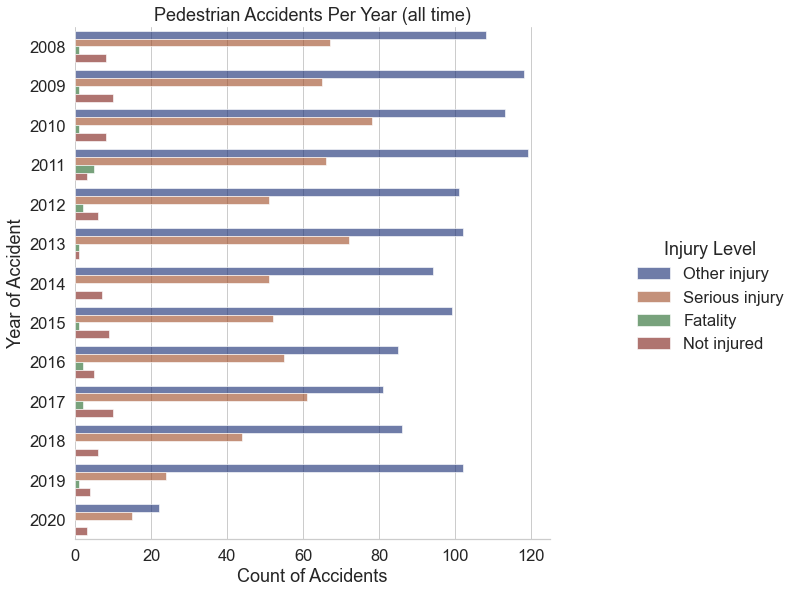

In [24]:
# Time series plots
# Accidents per hour (all time)

#Create a summary dataset to display results
wrk_accident_pedestrians_yeargrp = wrk_accident_pedestrians.groupby('NUMYearOfAcc').agg(NUMAccidentsPerYear=('NUMYearOfAcc', 'count'))
wrk_accident_pedestrians_yeargrp.reset_index(drop=False, inplace=True)
print(wrk_accident_pedestrians_yeargrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(y="NUMYearOfAcc", hue="CATInjuryLevelDesc_person", 
            kind="count",
            palette="dark", 
            alpha=.6,
            height=8,
            aspect=1,
            data=wrk_accident_pedestrians.sort_values(by='NUMYearOfAcc'))
g.despine(left=True)
g.set_axis_labels("Count of Accidents", "Year of Accident")
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Pedestrian Accidents Per Year (all time)")

**Inspecting 'Accidents per Weekday (All-Time)'**

In this section we will explore and observe how many pedestrian accidents have occurred by weekday.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

       index  CATDayOfWeek_accident
0     Friday                    353
1  Wednesday                    341
2   Thursday                    307
3   Saturday                    275
4    Tuesday                    269
5     Monday                    255
6     Sunday                    228


Text(0.5, 1.0, 'Pedestrian Accidents Per Weekday (all time)')

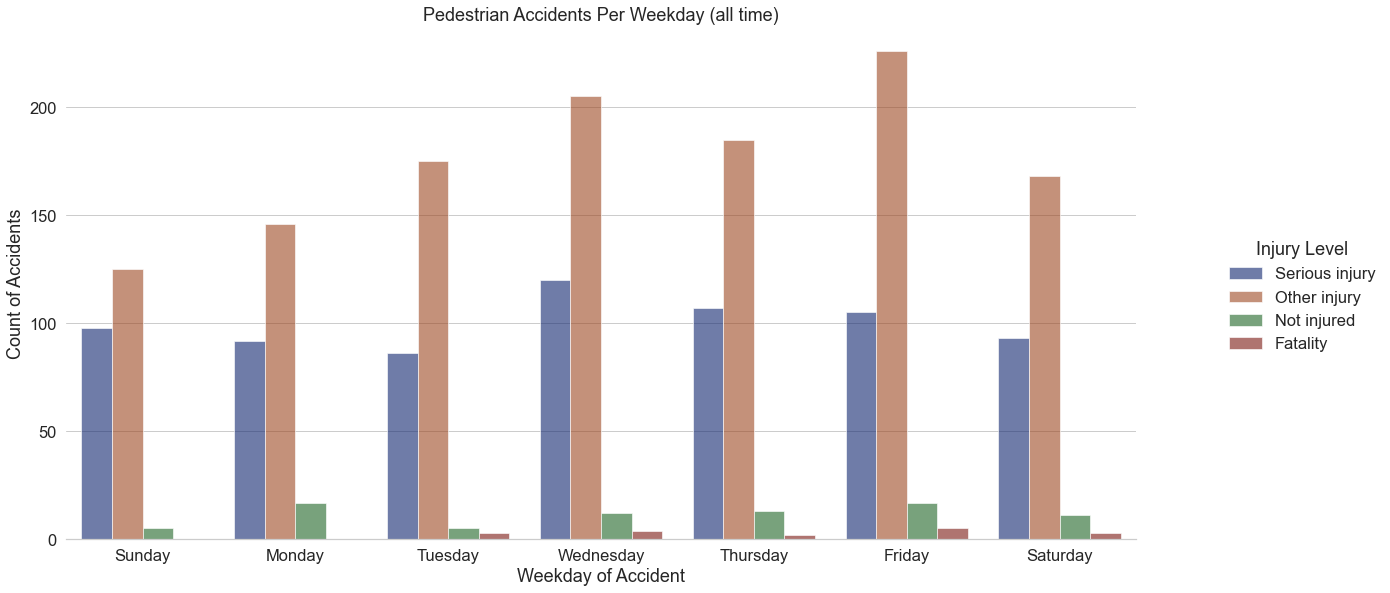

In [25]:
# Time series plots
# Accidents per week-day (all time)

#Create a summary dataset to display results
wrk_accident_pedestrians_weekdaygrp = wrk_accident_pedestrians.loc[:,'CATDayOfWeek_accident'].value_counts().to_frame()
wrk_accident_pedestrians_weekdaygrp.reset_index(drop=False, inplace=True)
print(wrk_accident_pedestrians_weekdaygrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATDayOfWeek_accident", y="NUMRecordCount", hue="CATInjuryLevelDesc_person", 
            kind="bar",
            palette="dark", 
            alpha=.6,
            height=8,
            aspect=2,
            data=wrk_accident_pedestrians.sort_values(by='NUMDayOfWeek'),
            estimator=sum)
g.despine(left=True)
g.set_axis_labels("Weekday of Accident", "Count of Accidents",)
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Pedestrian Accidents Per Weekday (all time)")

**Inspecting 'Accidents per Day (All-Days, Detailed)'**

In this section we will explore and observe how many pedestrian accidents
have occurred each day since the earliest date recorded in the dataset.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

          index  DATAccidentDate_accident
0    2018-06-03                         7
1    2010-04-25                         6
2    2010-03-29                         6
3    2012-03-14                         4
4    2009-02-26                         4
...         ...                       ...
1532 2018-03-15                         1
1533 2018-02-24                         1
1534 2009-10-26                         1
1535 2017-10-23                         1
1536 2020-02-11                         1

[1537 rows x 2 columns]


Text(0.5, 1.0, 'Pedestrian Accidents Per Day (all time)')

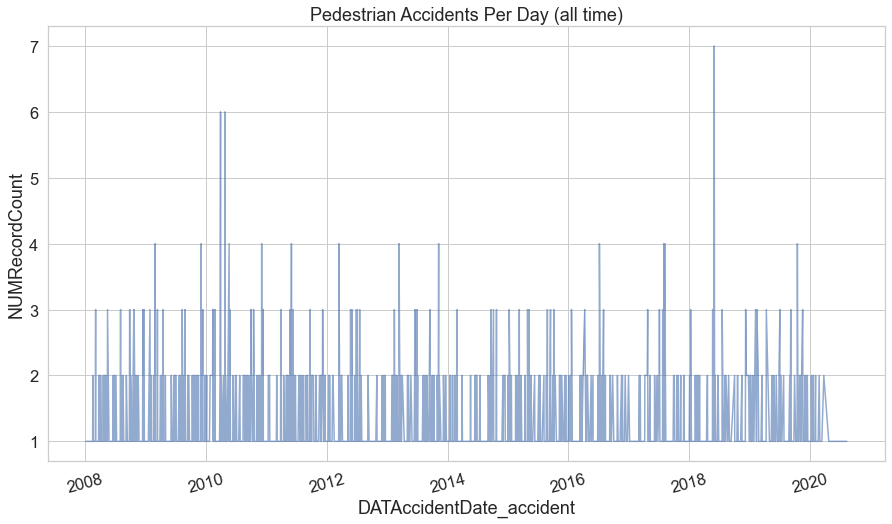

In [26]:
# Time series plots
# Accidents per day (all-time)

#Create a summary dataset to display results
wrk_accident_pedestrians_daygrp = wrk_accident_pedestrians.loc[:,'DATAccidentDate_accident'].value_counts().to_frame()
wrk_accident_pedestrians_daygrp.reset_index(drop=False, inplace=True)
print(wrk_accident_pedestrians_daygrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
g = sns.lineplot(x="DATAccidentDate_accident", y="NUMRecordCount", 
            palette="dark", 
            alpha=.6,
            data=wrk_accident_pedestrians.sort_values(by='DATAccidentDate_accident'),
            estimator=sum)
plt.xticks(rotation=15)
ax = plt.gca()
ax.set_title("Pedestrian Accidents Per Day (all time)")

**Inspecting 'Accidents per Weekday and Hour grouping (All-Time)'**

In this section we will explore and observe how many pedestrian accidents have occurred each weekday and hour grouping.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

                        index  CATWeekDayHourGroup
0        Sunday Early Morning                   95
1           Wednesday Evening                   77
2              Friday Evening                   74
3   Wednesday Early Afternoon                   74
4                Friday Night                   69
5            Thursday Evening                   66
6              Saturday Night                   62
7             Tuesday Evening                   61
8      Wednesday Late Morning                   61
9      Friday Early Afternoon                   61
10   Thursday Early Afternoon                   59
11     Saturday Early Morning                   55
12        Friday Late Morning                   55
13           Saturday Evening                   51
14        Monday Late Morning                   51
15       Tuesday Late Morning                   50
16             Monday Evening                   49
17      Thursday Late Morning                   48
18    Tuesday Early Afternoon  

Text(0.5, 1.0, 'Pedestrian Accidents Per Weekday and Hour Grouping (all time)')

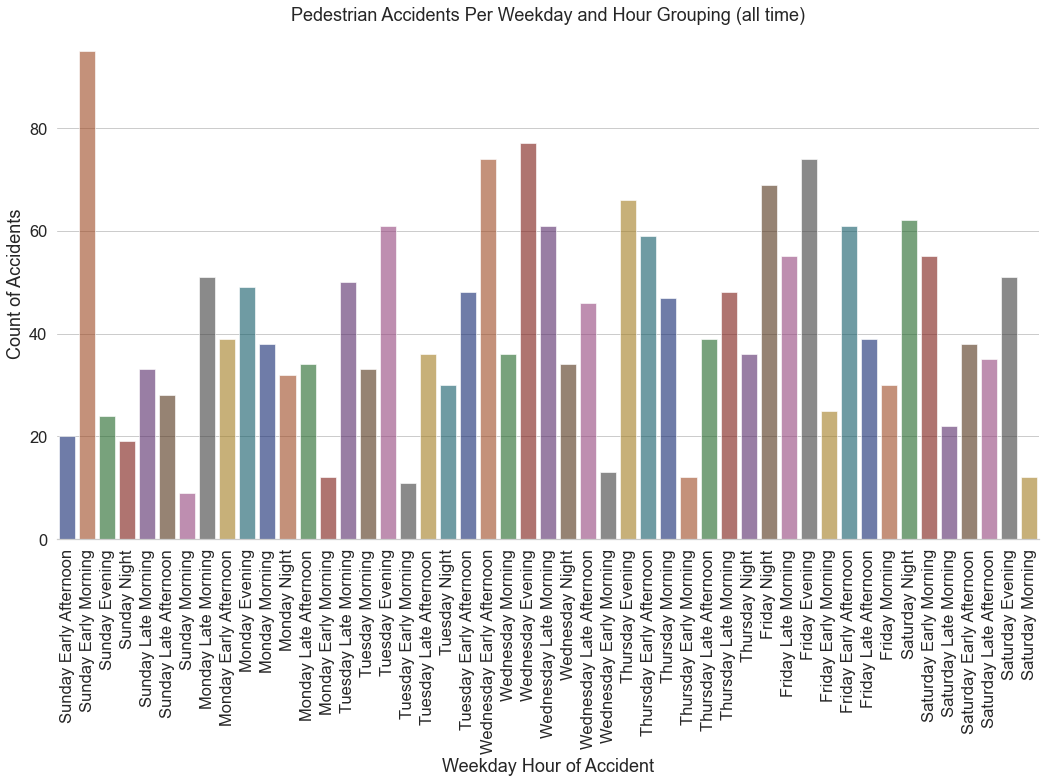

In [27]:
# Time series plots
# Accidents per Weekday and Hour Grouping (all time)

#Create a summary dataset to display results
wrk_accident_pedestrians_weekdayhrgrp = wrk_accident_pedestrians.loc[:,'CATWeekDayHourGroup'].value_counts().to_frame()
wrk_accident_pedestrians_weekdayhrgrp.reset_index(drop=False, inplace=True)
print(wrk_accident_pedestrians_weekdayhrgrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATWeekDayHourGroup", y="NUMRecordCount",
            kind="bar",
            palette="dark", 
            alpha=.6,
            height=8,
            aspect=2,
            data=wrk_accident_pedestrians.sort_values(by=['NUMDayOfWeek']),
            estimator=sum)
g.despine(left=True)
g.set_axis_labels("Weekday Hour of Accident", "Count of Accidents",)
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_title("Pedestrian Accidents Per Weekday and Hour Grouping (all time)")

**Inspecting the 'Geography of Pedestrian Accident Occurrences'**

In this section we will explore and observe the frequency of pedestrian accidents by geographical locations.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

                     index  CATAccidentRoadGroup
0         ELIZABETH STREET                   126
1          LONSDALE STREET                   101
2            ST KILDA ROAD                   101
3           COLLINS STREET                    95
4           SPENCER STREET                    83
5              KING STREET                    82
6            BOURKE STREET                    73
7          FLINDERS STREET                    71
8          LA TROBE STREET                    51
9          RACECOURSE ROAD                    51
10        CLARENDON STREET                    50
11           FLINDERS LANE                    50
12            ROYAL PARADE                    40
13         FLEMINGTON ROAD                    40
14         SWANSTON STREET                    36
15       EXHIBITION STREET                    33
16               CITY ROAD                    32
17         VICTORIA STREET                    31
18            ELGIN STREET                    29
19               PUN

Text(0.5, 1.0, 'Pedestrian Accident Location - Roads Names (all time)')

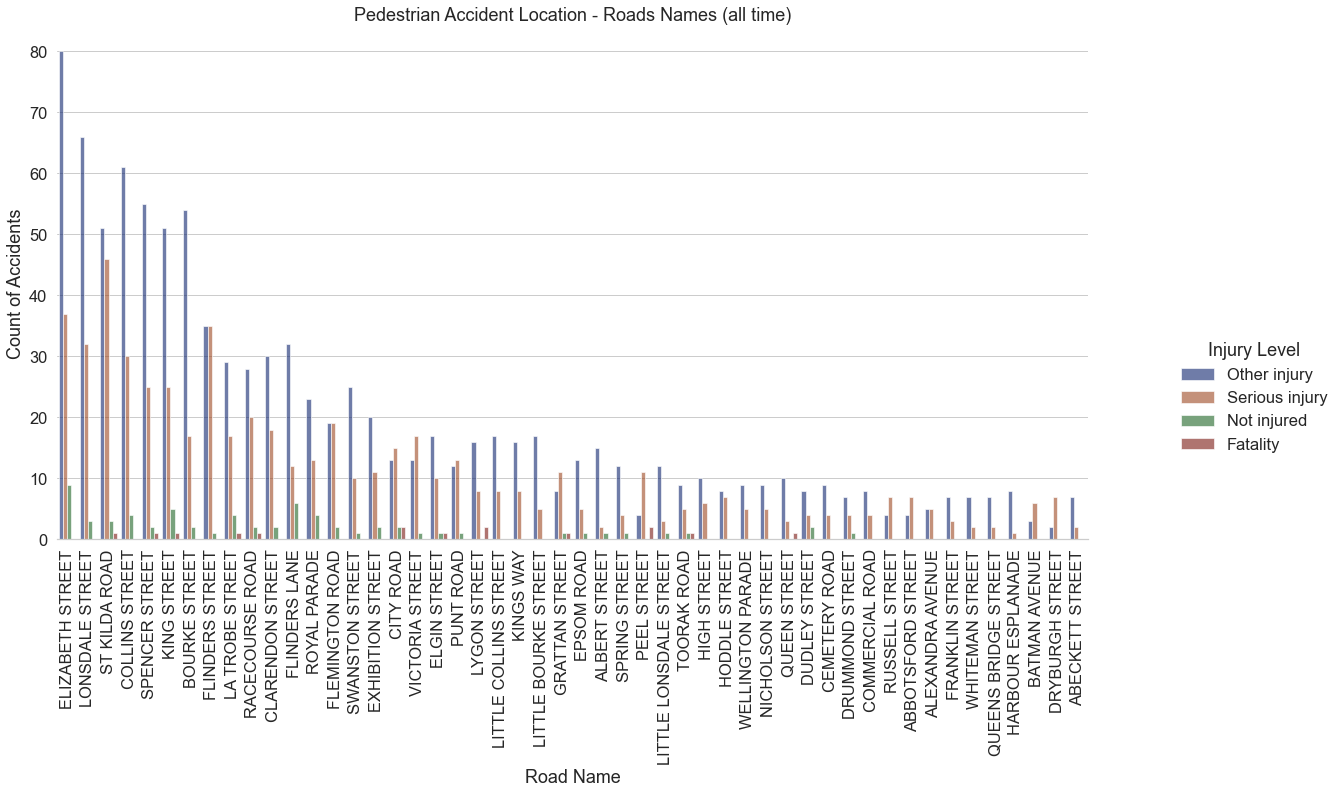

In [28]:
# Geographical analysis. Streets with most accidents
# Which roads have the most frequent accidents?

#Create a summary dataset to display results
wrk_accident_pedestrians_roadsgrp = wrk_accident_pedestrians.loc[:,'CATAccidentRoadGroup'].value_counts().to_frame()
wrk_accident_pedestrians_roadsgrp.reset_index(drop=False, inplace=True)
wrk_accident_pedestrians_roadsgrp = wrk_accident_pedestrians_roadsgrp.head(50)
print(wrk_accident_pedestrians_roadsgrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATAccidentRoadGroup", y="NUMRecordCount", hue="CATInjuryLevelDesc_person", 
            kind="bar",
            palette="dark", 
            alpha=.6,
            height=8,
            aspect=2,
            order=wrk_accident_pedestrians.CATAccidentRoadGroup.value_counts().iloc[:50].index,
            data=wrk_accident_pedestrians.sort_values(by=['CATAccidentRoadGroup']),
            estimator=sum)
g.despine(left=True)
plt.xticks(rotation=90)
g.set_axis_labels("Road Name", "Count of Accidents",)
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Pedestrian Accident Location - Roads Names (all time)")

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Visualising the Pedestrian Accident Data on a Map</b>

**Creating the first map visual to observe where pedestrian accidents are occurring**

In [37]:
import folium
from folium.plugins import MarkerCluster
def map_visualization(data):
    locations = []
    for i in range(len(data)):
        row =data.iloc[i]
        location = [(row.NUMLatitude_node,row.NUMLongitude_node)]*int(row.NUMRecordCount)
        locations += location
      
    marker_cluster  = MarkerCluster(
      locations=locations,
      overlay=True,
      control=True,
      )
    m = folium.Map(location=[-37.81368709240999, 144.95738102347036], tiles="Cartodb Positron", zoom_start=13)
    marker_cluster.add_to(m)

    folium.LayerControl().add_to(m)
    
    m
    return m
map_visualization(wrk_accident_pedestrians)

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Visualising the Melbourne Pedestrian Route Network and Pedestrian Accident Data</b>

**Creating an Alternative Map Visual to Distinguish Accidents by Year and Injury Type**

To observe the Melbourne Pedestrian Route JSON map overlayed with the Pedestrian Accident Data we can use the following code.

In [ ]:
# Function to change the marker color
# according to the injury level
def color(CATInjuryLevelDesc_person):
    if CATInjuryLevelDesc_person == "Not injured":
        col = 'green'
    elif CATInjuryLevelDesc_person == "Other injury":
        col = 'blue'
    elif CATInjuryLevelDesc_person == "Serious injury":
        col = 'orange'
    elif CATInjuryLevelDesc_person == "Fatality":
        col = 'red'
    else:
        col='black'
    return col

# Creating a map object using Map() function.
# Location parameter takes latitudes and
# longitudes as starting location.
# (Map will be centered at those co-ordinates)
m = folium.Map(location=[-37.81368709240999, 144.95738102347036],
                zoom_start=12, 
                tiles="cartodbpositron",
                control_scale=True,
                prefer_canvas=True, 
                width=800, 
                height=580) 

#Create a feature group by accident year
#Year2008 = folium.FeatureGroup(name = 'Accident Year 2008')
#Year2009 = folium.FeatureGroup(name = 'Accident Year 2009')
#Year2010 = folium.FeatureGroup(name = 'Accident Year 2010')
#Year2011 = folium.FeatureGroup(name = 'Accident Year 2011')
#Year2012 = folium.FeatureGroup(name = 'Accident Year 2012')
#Year2013 = folium.FeatureGroup(name = 'Accident Year 2013')
#Year2014 = folium.FeatureGroup(name = 'Accident Year 2014')
#Year2015 = folium.FeatureGroup(name = 'Accident Year 2015')
#Year2016 = folium.FeatureGroup(name = 'Accident Year 2016')
Year2017 = folium.FeatureGroup(name = 'Accident Year 2017')
Year2018 = folium.FeatureGroup(name = 'Accident Year 2018')
Year2019 = folium.FeatureGroup(name = 'Accident Year 2019')
Year2020 = folium.FeatureGroup(name = 'Accident Year 2020')

#Loop through each row of the working dataset
for i, v in wrk_accident_pedestrians.iterrows():
    
    accyear = int(v['NUMYearOfAcc'])    
    popup = """
    Accident ID : <b>%s</b><br>
    Year : <b>%s</b><br>
    Injury : <b>%s</b><br>
    Long : <b>%s</b><br> 
    Lat: <b>%s</b><br>
    """ % (v['KEYAccidentNumber'], v['NUMYearOfAcc'], 
           v['CATInjuryLevelDesc_person'], v['NUMLongitude_node'], 
           v['NUMLatitude_node'])
    
    # For each accident year in the dataset determine 
    # all marker points and add as separate layers so we can control the display for them
#    if accyear == 2008:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2008)  
#    
#    if accyear == 2009:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2009)  
#    
#    if accyear == 2010:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2010)      
#    
#    if accyear == 2011:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2011)      
#    
#    if accyear == 2012:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2012)      
#    
#    if accyear == 2013:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2013)      
#    
#    if accyear == 2014:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2014)      
#    
#    if accyear == 2015:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2015)    
#    
#    if accyear == 2016:
#        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
#                           tooltip = popup,
#                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
#                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2016)      
#    
    if accyear == 2017:
        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2017)       
        
    if accyear == 2018:
        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2018)
    
    if accyear == 2019:
        folium.Marker(location = [v['NUMLatitude_node'], 
                                  v['NUMLongitude_node']],                           
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2019)

    if accyear == 2020:
        folium.Marker(location = [v['NUMLatitude_node'], 
                                 v['NUMLongitude_node']],
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'male', prefix='fa')).add_to(Year2020)
        
#Add the layers to the base map
#Year2008.add_to(m)
#Year2009.add_to(m)
#Year2010.add_to(m)
#Year2011.add_to(m)
#Year2012.add_to(m)
#Year2013.add_to(m)
#Year2014.add_to(m)
#Year2015.add_to(m)
#Year2016.add_to(m)
Year2017.add_to(m)
Year2018.add_to(m)
Year2019.add_to(m)
Year2020.add_to(m)

#Add in the bicycle network geoJSON as a layer
folium.GeoJson(pedestrianpath,
               name="json",
               tooltip=folium.features.GeoJsonTooltip(fields=['OBJECTID', 'NETID', 'TYPE', 'MCCID', 'MCCID_A', 'MCCID_B', 'OTIME', 'CTIME', 'COST', 'Shape_Length', 'DESCRIPTION', 'TRAFFIC'], 
                                                      localize=True)).add_to(m)   

#Add the map control
folium.LayerControl(collapsed = False).add_to(m)

#Show the map
m

#Save the map
#m.save('geoJSON_bicycleaccidents_map.html')

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;
Findings and Opportunities</b>

This analysis has provided a comprehensive starting point for inspecting the Melbourne Open Data Pedestrian Network dataset and Traffic Accidents (Pedestrians) data.

**We achieved in this analysis:**

- A series of visualisations which illustrate the frequency, timing and basic characteristics of pedestrian accidents occurring in Melbourne between the years 2008 and 2020
- A series of map visualisations which illustrate the precise location of where pedestrian accidents have occurred and a means to visually compare the locations to the pedestrian path network


**We learned from this analysis:**

- How to interpret, analyse and visualise JSON files
- How to create geographical maps with JSON files and dataframes to display geographical features
- As a preliminary view, we observed that a majority of pedestrian accidents did occurr on pedestrian network routes

    At a broad level:
    
    The total number of pedestrian accidents where cyclists have been seriously of fatally injured has been reducing over time (excluding the year 2020 as it was under-developed with only 3 months of data). More than XXXXXX pedestrian in XXXX_YEAR_XXX to less than XXX in XXXX_YEAR_XXXX. This appears to be a positive and optimistic trend.

    The week days of XXXXXX and XXXXXX appear to have the highest numbers of seriously injured pedestrian. Separate to this, the hours of XXXXX and XXXXX have the highest numbers of seriously injured pedestrian.

    The top three roads with the higest number of seriously injured pedestrian include XXXXXX Street, XXXXX Street and XXXXXX.

**Observations for further opportunities**

- What are the traffic accident circumstances? Are pedestrian being struck by cars an increasing or decreasing problem?
- Do accidents co-occur with road-works, weather events or other disruptive events?
- Report on sections of roadway where higher accident rates are observed
- Part 2 of the Pedestrian Network and Road Safety exploratory data analysis will dive deeper into the timing, geography, circumstance and 'hotspots' of pedestrian accidents.


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;
References</b>

[1] Thompson Road North Geelong Road Safety Improvements https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements

[2] Victorian 'Crash-Stat's dataset https://discover.data.vic.gov.au/dataset/crash-stats-data-extract/resource/392b88c0-f010-491f-ac92-531c293de2e9

[3] Pedestrian Routes Dataset https://data.melbourne.vic.gov.au/Transport/Pedestrian-Network/4id4-tydi


**Technical References**

[4] Accessing geoJSON data https://stackoverflow.com/questions/48263802/finding-location-using-geojson-file-using-python

[5] Accessing geoJSON data https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

[6] Visualising a geoJSON dataset https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays

[7] Visualising categorised data on a map https://www.geeksforgeeks.org/python-adding-markers-to-volcano-locations-using-folium-package/

[8] Creating point plot group layers with folium https://towardsdatascience.com/creating-an-interactive-map-of-wildfire-data-using-folium-in-python-7d6373b6334a

[9] Ideas for further opportunities - Time Series Analysis https://geohackweek.github.io/ghw2018_web_portal_inlandwater_co2/InteractiveTimeSeries.html

In [ ]:
!jupyter nbconvert --to html usecase-bicyclenetworkroadsafety-part1.ipynb